In [1]:
# !pip install ipynb
from matplotlib import pyplot as plt
import numpy as np

from ipynb.fs.full.useful_functions import find_spectrum, define_instance

# For the legend
from matplotlib.patches import Patch, Rectangle
from matplotlib.lines import Line2D

# For x-ticks
from matplotlib.ticker import MultipleLocator

In [206]:
def find_k_given_B_and_L(states_feasible, U, subsets, L, min_B=0, max_B=None):
    """
    Compute `ratio` for every |B| such that `min_B` <= |B| <= `max_B`, 
    enumerating `states_feasible`.
    
    Parameters
    ----------
        states_feasible (list): a list containing feasible states 
                                to use in the computation.
        U (set): the instance set.
        subsets (list of sets): a list containing the instance subsets.
        L (int): a value such that |A|=|MEC| <= L.
        min_B (int): min_B is the |B| from which the computation must start.
        max_B (int): max_B is the |B| at which the computation must end. 
                     If None, max_B is set equal to L.

    Returns
    -------
        ratio_list (list): the list of `ratio` you get by enumerating `states_feasible` 
                       and computing the ratio for every value of `min_B` <= |B| <= `max_B`.
    """
    
    #### ASSOCIO A OGNI STATO IL PROPRIO PESO 
    weights=[]
    for state in states_feasible:
        weight=0
        for pos,digit in enumerate(state):
            if digit =="1":
                weight += len(subsets[pos])
        weights.append(weight)
    
    states_and_weights = {(state, w) for state,w in zip(states_feasible, weights)}

    ### FACCIO IL CONTO DEL RAPPORTO PER OGNI VALORE DI |B|
    u = len(U)
    
    ratio_list = []

    if max_B == None: max_B = L # The maximum value for |B| is L.
                                # (actually, |B| can be > L, but we're not interested, 
                                #  since the numerator in the ratio would be negative)
    for num_of_ones in range(min_B, max_B+1): 
        
        # print(f"\nLooking for states with {num_of_ones} '1'...")
        
        sub_states_and_weights = [] # subset of (state, weight)
    
        for state_and_weight in states_and_weights:
            if state_and_weight[0].count("1") == num_of_ones:
                ### Be careful and remove exact covers
                if not (state_and_weight[0] in EXACT_COVERS):
                    sub_states_and_weights.append(state_and_weight)
                
        if sub_states_and_weights == []:
            # print(f"No state with {num_of_ones} '1' found. Cycle stopped.")
            continue
        
        # print(sub_states_and_weights)
        
        weights = [state_and_weight[1] for state_and_weight in sub_states_and_weights]
        max_t = max(weights)
        # print("Maximum weight:", max_t)
    
        ratio = ((L - num_of_ones)/(u - max_t)) / PROBLEM_DIM
        ratio_list.append(ratio)
        # print(f"k_{num_of_ones} = {ratio}")

    return(ratio_list)

## Al variare di |B| e t, come varia il rapporto?
#### Fissata PROBLEM_DIM=6, per ogni istanza calcolo ratio_list, per enumerazione degli stati feasible, con L=L_MEC.



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.041666666666666664
[('010000', 6), ('001000', 3), ('000010', 6), ('000100', 3), ('000001', 5), ('100000', 6)]
Maximum weight: 6
k_1 = 0.05555555555555555
[('001100', 6), ('100100', 9), ('101000', 9)]
Maximum weight: 9
k_2 = 0.05555555555555555
[0.041666666666666664, 0.05555555555555555, 0.05555555555555555]


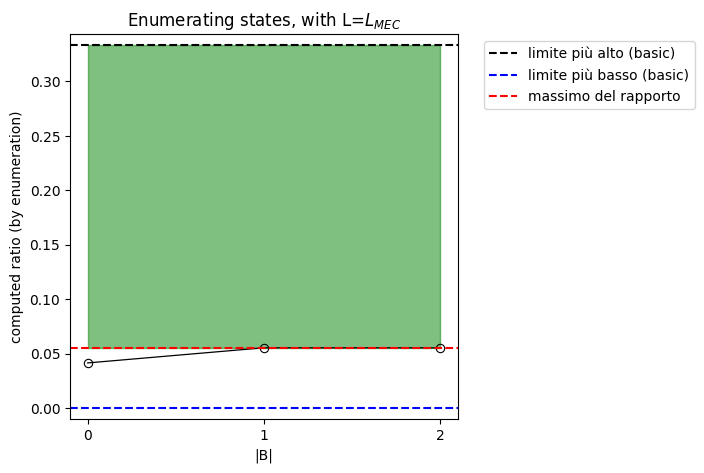



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.027777777777777776
[('000100', 2), ('001000', 6), ('010000', 6), ('100000', 4), ('000010', 6), ('000001', 5)]
Maximum weight: 6
k_1 = 0.027777777777777776
[0.027777777777777776, 0.027777777777777776]


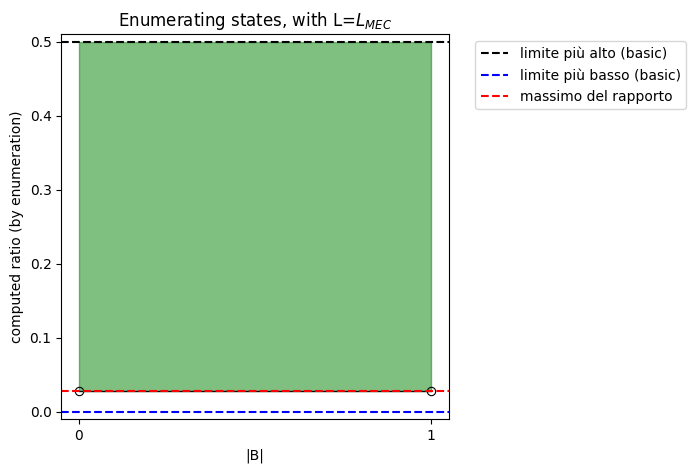



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.027777777777777776
[('000010', 7), ('001000', 5), ('000001', 2), ('100000', 3), ('010000', 7), ('000100', 5)]
Maximum weight: 7
k_1 = 0.03333333333333333
[('100001', 5), ('110000', 10), ('010001', 9), ('000101', 7)]
Maximum weight: 10
k_2 = 0.0
[0.027777777777777776, 0.03333333333333333, 0.0]


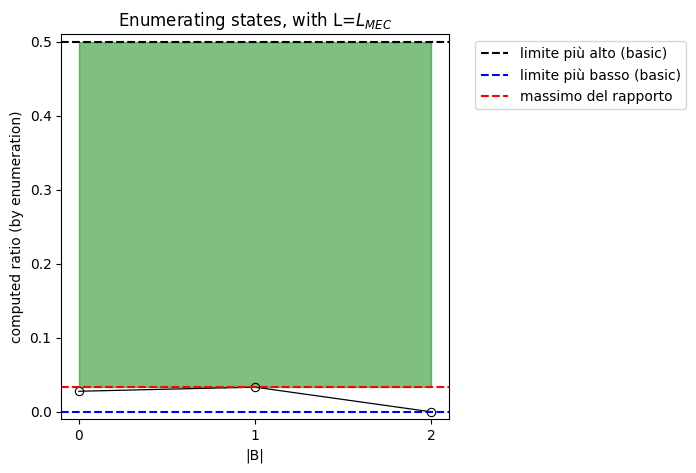



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.027777777777777776
[('000010', 4), ('000001', 3), ('100000', 7), ('010000', 5), ('001000', 4), ('000100', 5)]
Maximum weight: 7
k_1 = 0.03333333333333333
[('001010', 8), ('001001', 7), ('011000', 9), ('010001', 8)]
Maximum weight: 9
k_2 = 0.0
[0.027777777777777776, 0.03333333333333333, 0.0]


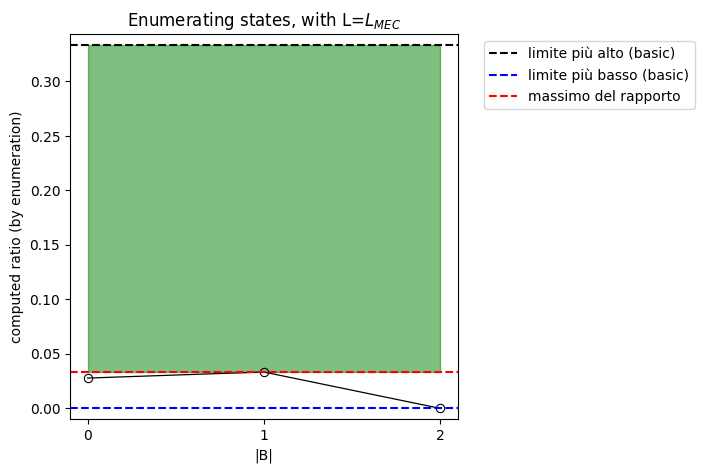



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.027777777777777776
[('010000', 6), ('100000', 2), ('000010', 6), ('000100', 2), ('000001', 3), ('001000', 5)]
Maximum weight: 6
k_1 = 0.027777777777777776
[('000110', 8), ('100100', 4), ('001001', 8), ('101000', 7), ('000101', 5), ('100001', 5), ('001100', 7)]
Maximum weight: 8
k_2 = 0.0
[0.027777777777777776, 0.027777777777777776, 0.0]


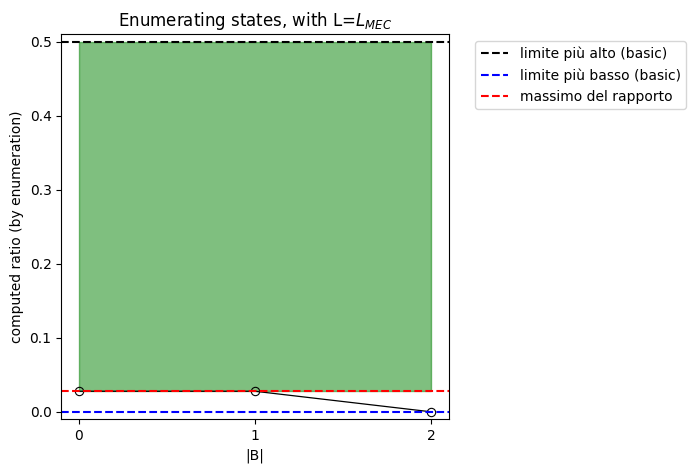



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.027777777777777776
[('000001', 6), ('000100', 4), ('100000', 10), ('000010', 2), ('010000', 4), ('001000', 4)]
Maximum weight: 10
k_1 = 0.08333333333333333
[('010001', 10), ('001100', 8), ('010100', 8), ('011000', 8), ('010010', 6), ('000011', 8)]
Maximum weight: 10
k_2 = 0.0
[0.027777777777777776, 0.08333333333333333, 0.0]


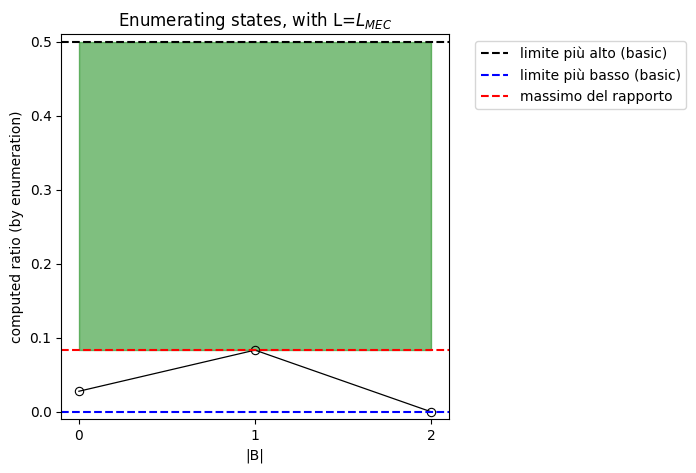



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.041666666666666664
[('000100', 2), ('001000', 7), ('010000', 3), ('100000', 7), ('000010', 5), ('000001', 4)]
Maximum weight: 7
k_1 = 0.06666666666666667
[('110000', 10), ('100100', 9), ('010100', 5), ('010010', 8)]
Maximum weight: 10
k_2 = 0.08333333333333333
[0.041666666666666664, 0.06666666666666667, 0.08333333333333333]


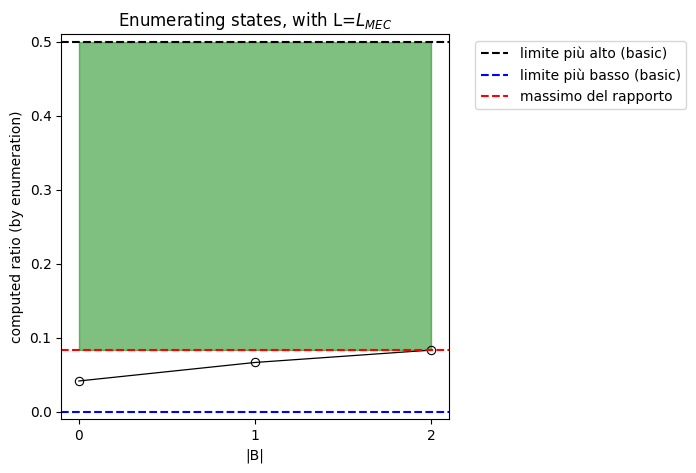



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.041666666666666664
[('100000', 8), ('000001', 3), ('000100', 7), ('001000', 5), ('010000', 4), ('000010', 8)]
Maximum weight: 8
k_1 = 0.08333333333333333
[('010001', 7), ('011000', 9), ('001001', 8)]
Maximum weight: 9
k_2 = 0.05555555555555555
[0.041666666666666664, 0.08333333333333333, 0.05555555555555555]


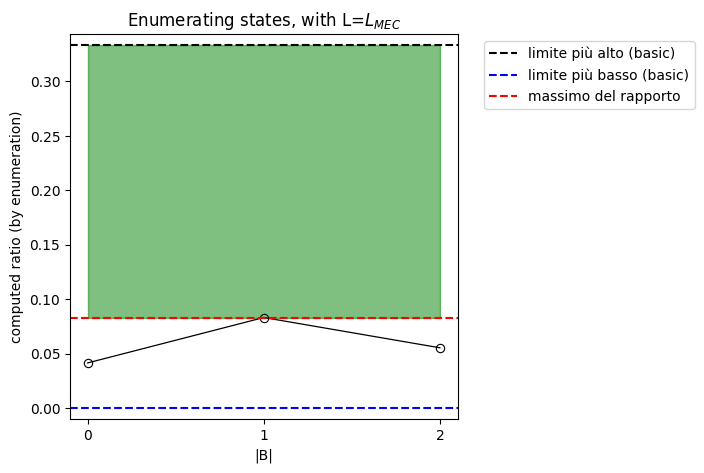



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.027777777777777776
[('000010', 7), ('100000', 7), ('010000', 5), ('001000', 5), ('000100', 6), ('000001', 4)]
Maximum weight: 7
k_1 = 0.03333333333333333
[('001001', 9)]
Maximum weight: 9
k_2 = 0.0
[0.027777777777777776, 0.03333333333333333, 0.0]


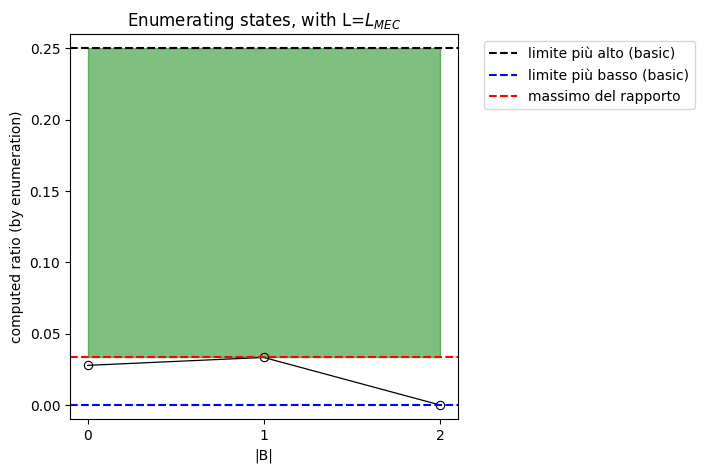



####################
[('000000', 0)]
Maximum weight: 0
k_0 = 0.027777777777777776
[('010000', 6), ('000001', 7), ('000100', 8), ('001000', 7), ('100000', 4), ('000010', 8)]
Maximum weight: 8
k_1 = 0.041666666666666664
[0.027777777777777776, 0.041666666666666664]


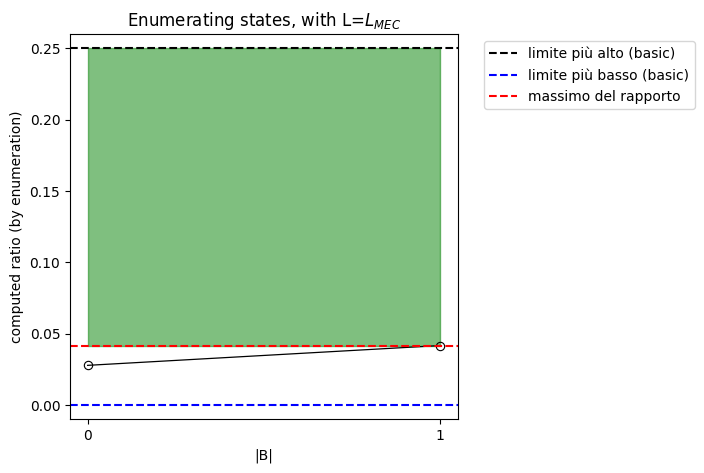

In [9]:
PROBLEM_DIM = 6

for instance in range(1,10+1):
    print("\n\n"+"#"*20)
    
    ### Build the instance.
    U, subsets_dict = define_instance(PROBLEM_DIM, instance, verbose=False)
    subsets = list(subsets_dict.values())
    lengths = [len(s) for s in subsets]
    # build_instance_graph(subsets)
        
    #####################################
    ### Find feasible states.
    _, _, states_feasible, _, EXACT_COVERS = find_spectrum(U, subsets_dict, PROBLEM_DIM, k=1)

    MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]
    
    # print("EXACT_COVERS:", EXACT_COVERS)
    # print("MEC:", MEC)
        
    #####################################
    ### L_EC are the lengths of the exact covers.
    L_EC = [e.count("1") for e in EXACT_COVERS]
    L_MEC = min(L_EC) ## se prende proprio la MEC
        
    ###################################
    ratio_list_L_MEC = find_k_given_B_and_L(states_feasible, U, subsets, L_MEC)
    print(ratio_list_L_MEC)
    # max_ratio_L_MEC = max(ratio_list_L_MEC)
    
    ###################################
    ### prendo valore piu grande sopra e valore piu grande sotto, 
    ### anche senza matchare. poi idem con il piu piccolo
    k_piu_grande_possibile = 1 / min(lengths)
    k_piu_piccolo_possibile = 0 # quando |A| = |B|
    
    ###################################
    ### PLOT
    plt.figure(figsize=(5,5))
    plt.plot(np.arange(len(ratio_list_L_MEC)), ratio_list_L_MEC, color = 'k', linestyle = 'solid', linewidth=0.9,
             marker="o", markerfacecolor="None", markeredgecolor='k', markeredgewidth=0.8)

    ### RIGHE ORIZZONTALI
    plt.ylim(-0.01,k_piu_grande_possibile+0.01)
    # x = len(ratio_list_L_MEC)-1 +(1.5/10)*(len(ratio_list_L_MEC))
    
    plt.axhline(y=k_piu_grande_possibile, color = 'k', linestyle = '--', linewidth=1.5, label='limite più alto (basic)')
    # plt.text(x, k_piu_grande_possibile, 'più grande', fontsize=9, color="k", va='center', ha='center', backgroundcolor='w')
    
    plt.axhline(y=k_piu_piccolo_possibile, color = 'b', linestyle = '--', linewidth=1.5, label='limite più basso (basic)')
    # plt.text(x, k_piu_piccolo_possibile, 'limite minimo (basic)', fontsize=9, color="b", va='center', ha='center', backgroundcolor='w')
    
    plt.axhline(y=max(ratio_list_L_MEC), color = 'r', linestyle = '--', linewidth=1.5, label='massimo del rapporto') 
    # plt.text(x, max(ratio_list_L_MEC), f"k da scegliere = {round(max(ratio_list_L_MEC),3)}", fontsize=9, color="r", va='center', ha='right', backgroundcolor='w')
    

    ### RETTANGOLO CHE MI DICE DOVE POSSO SCEGLIERE K
    rect = Rectangle((0,max(ratio_list_L_MEC)), len(ratio_list_L_MEC)-1, k_piu_grande_possibile-max(ratio_list_L_MEC), 
                      color='green', alpha=0.5)
    plt.gca().add_patch(rect)

    
    ### TICKS AS NATURAL NUMBERS
    plt.gca().xaxis.set_major_locator(MultipleLocator(1))
    plt.xlabel("|B|")
    plt.ylabel("computed ratio (by enumeration)")
    plt.title("Enumerating states, with L=$L_{MEC}$")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

## In che modo cambiare L influenza il rapporto? 
##### Creo un dizionario in cui: 
##### per ogni dimensione,
##### per ogni istanza, 
##### per 3 diversi L,
##### calcolo per enumerazione il rapporto.
I diversi L sono:

0) L=PROBLEM_DIM, 
1) L=lunghezza dell'EC più grande, 
2) L=lunghezza MEC.

In [13]:
d_all_dimensions = {}
for PROBLEM_DIM in [6,8,10]:
    d_fixed_dimension = {}
    for instance in range(1,10+1):
        ratios_for_fixed_instance = []
        
        ### Build the instance.
        U, subsets_dict = define_instance(PROBLEM_DIM, instance, verbose=False)
        subsets = list(subsets_dict.values())
        lengths = [len(s) for s in subsets]
        # build_instance_graph(subsets)
        
        #####################################
        ### Find feasible states.
        _, _, states_feasible, energies_feasible, EXACT_COVERS = find_spectrum(U, subsets_dict, PROBLEM_DIM, k=1)
        MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]
        
        # print("EXACT_COVERS:", EXACT_COVERS)
        # print("MEC:", MEC)
        
        L_EC = [e.count("1") for e in EXACT_COVERS]
        
        ###################################### 
        ### CALCOLO 3 VOLTE IL RAPPORTO:

        for L in [PROBLEM_DIM, max(L_EC), min(L_EC)]:
            ratio = (L / min(lengths)) / PROBLEM_DIM
            ratios_for_fixed_instance.append(ratio)
            
        d_fixed_dimension[instance] = ratios_for_fixed_instance
    d_all_dimensions[PROBLEM_DIM] = d_fixed_dimension
d_all_dimensions

{6: {1: [0.3333333333333333, 0.16666666666666666, 0.16666666666666666],
  2: [0.5, 0.16666666666666666, 0.16666666666666666],
  3: [0.5, 0.25, 0.16666666666666666],
  4: [0.3333333333333333, 0.16666666666666666, 0.1111111111111111],
  5: [0.5, 0.3333333333333333, 0.16666666666666666],
  6: [0.5, 0.25, 0.16666666666666666],
  7: [0.5, 0.25, 0.25],
  8: [0.3333333333333333, 0.16666666666666666, 0.16666666666666666],
  9: [0.25, 0.08333333333333333, 0.08333333333333333],
  10: [0.25, 0.08333333333333333, 0.08333333333333333]},
 8: {1: [0.25, 0.0625, 0.0625],
  2: [0.3333333333333333, 0.125, 0.08333333333333333],
  3: [0.2, 0.075, 0.05],
  4: [0.25, 0.125, 0.0625],
  5: [0.16666666666666666, 0.041666666666666664, 0.041666666666666664],
  6: [0.25, 0.09375, 0.09375],
  7: [0.25, 0.0625, 0.0625],
  8: [0.3333333333333333, 0.125, 0.08333333333333333],
  9: [0.3333333333333333, 0.16666666666666666, 0.08333333333333333],
  10: [0.25, 0.09375, 0.09375]},
 10: {1: [0.2, 0.06, 0.04],
  2: [0.2, 0.

##### Plot del contenuto del dizionario

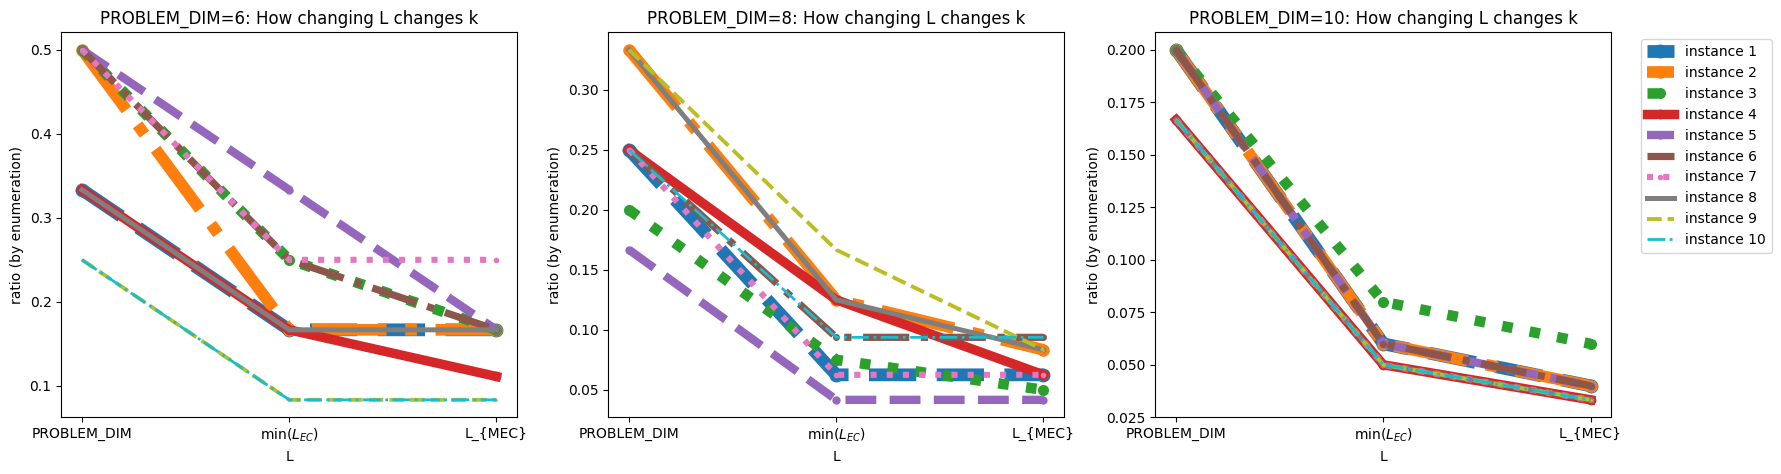

In [16]:
plt.figure(figsize=(20,5))

for num_subplot,PROBLEM_DIM in enumerate([6,8,10]):
    
    plt.subplot(1,3,num_subplot+1)
    plt.title(f"PROBLEM_DIM={PROBLEM_DIM}: How changing L changes k")
    
    for instance,ratio_list in d_all_dimensions[PROBLEM_DIM].items(): # guardo le istanze a dimensione 6
        
        ##### BUILD THE INSTANCE
        U, subsets_dict = define_instance(PROBLEM_DIM, instance, verbose=False)
        subsets = list(subsets_dict.values())
        lengths = [len(s) for s in subsets]
    
        ##### PLOT
        x_ticks = np.arange(1, len(ratio_list)+1)
        lw = 10 - 8*instance/10
        ls = ['-','--','-.',':'][instance%4]
        plt.plot(x_ticks, ratio_list, linestyle=ls, linewidth=lw,
                 marker="o", markersize=10-instance, markeredgewidth=1,
                 label=f"instance {instance}")
        
    plt.xticks(x_ticks, ["PROBLEM_DIM", "min($L_{EC}$)", "L_{MEC}"])
    plt.xlabel("L")
    plt.ylabel("ratio (by enumeration)")
    
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Come varia il rapporto al variare delle istanze, delle dimensioni e di L?
##### Creo un dizionario in cui: 
##### per ogni dimensione,
##### per ogni L (L=PROBLEM_DIM, L=lunghezza dell'EC più grande, L=lunghezza MEC)
##### ho una lista lunga 10 con il rapporto calcolato per ogni istanza.

In [55]:
d = {}
for PROBLEM_DIM in [6,8,10]:
    d[PROBLEM_DIM] = {"L=PROBLEM_DIM": [ratio_list[0] for ratio_list in d_all_dimensions[PROBLEM_DIM].values()], 
                      "L=max(L_EC)": [ratio_list[1] for ratio_list in d_all_dimensions[PROBLEM_DIM].values()],
                      "L=L_MEC": [ratio_list[2] for ratio_list in d_all_dimensions[PROBLEM_DIM].values()]}
d

{6: {'L=PROBLEM_DIM': [0.3333333333333333,
   0.5,
   0.5,
   0.3333333333333333,
   0.5,
   0.5,
   0.5,
   0.3333333333333333,
   0.25,
   0.25],
  'L=max(L_EC)': [0.16666666666666666,
   0.16666666666666666,
   0.25,
   0.16666666666666666,
   0.3333333333333333,
   0.25,
   0.25,
   0.16666666666666666,
   0.08333333333333333,
   0.08333333333333333],
  'L=L_MEC': [0.16666666666666666,
   0.16666666666666666,
   0.16666666666666666,
   0.1111111111111111,
   0.16666666666666666,
   0.16666666666666666,
   0.25,
   0.16666666666666666,
   0.08333333333333333,
   0.08333333333333333]},
 8: {'L=PROBLEM_DIM': [0.25,
   0.3333333333333333,
   0.2,
   0.25,
   0.16666666666666666,
   0.25,
   0.25,
   0.3333333333333333,
   0.3333333333333333,
   0.25],
  'L=max(L_EC)': [0.0625,
   0.125,
   0.075,
   0.125,
   0.041666666666666664,
   0.09375,
   0.0625,
   0.125,
   0.16666666666666666,
   0.09375],
  'L=L_MEC': [0.0625,
   0.08333333333333333,
   0.05,
   0.0625,
   0.0416666666666666

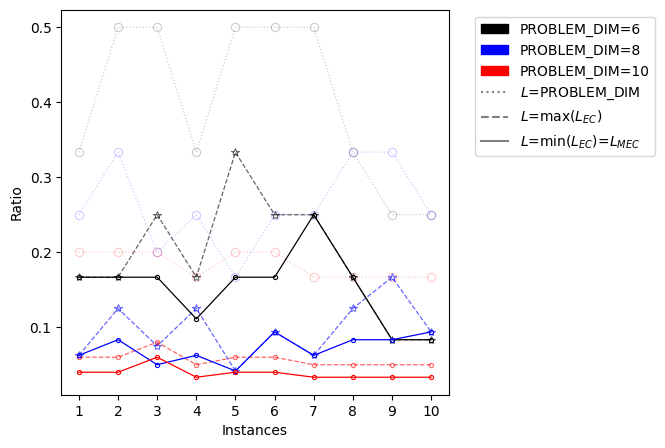

In [56]:
### PLOT
plt.figure(figsize=(5,5))
x = np.arange(1, 11)
plt.ylabel("Ratio")
plt.xlabel("Instances")

### QUELLI CON L = PROBLEM_DIM
alpha = 0.2
linestyle = 'dotted'
plt.plot(x, d[6]["L=PROBLEM_DIM"], color = 'k', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="o", markerfacecolor="None", markeredgecolor='k', markeredgewidth=0.8)
plt.plot(x, d[8]["L=PROBLEM_DIM"], color = 'b', linestyle=linestyle, linewidth=0.9,  alpha=alpha,
         marker="o", markerfacecolor="None", markeredgecolor='b', markeredgewidth=0.8)
plt.plot(x, d[10]["L=PROBLEM_DIM"], color = 'r', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="o", markerfacecolor="None", markeredgecolor='r', markeredgewidth=0.8)
line_1 = Line2D([], [], color='grey', linestyle=linestyle,
                          markersize=15, label='$L$=PROBLEM_DIM')

### QUELLI CON L = LUNGHEZZA DELL'EC PIU' GRANDE
alpha = 0.6
linestyle = 'dashed'
plt.plot(x, d[6]["L=max(L_EC)"], color = 'k', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="*", markerfacecolor="None", markeredgecolor='k', markeredgewidth=0.8)
plt.plot(x, d[8]["L=max(L_EC)"], color = 'b', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="*", markerfacecolor="None", markeredgecolor='b', markeredgewidth=0.8)
plt.plot(x, d[10]["L=max(L_EC)"], color = 'r', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker=".", markerfacecolor="None", markeredgecolor='r', markeredgewidth=0.8)
line_2 = Line2D([], [], color='grey', linestyle=linestyle,
                          markersize=15, label='$L$=max($L_{EC}$)')

### QUELLI CON L = LUNGHEZZA DELLA MEC
alpha = 1
linestyle = 'solid'
plt.plot(x, d[6]["L=L_MEC"], color = 'k', linestyle=linestyle, linewidth=0.9,  label = "PROBLEM_DIM=6",alpha=alpha,
         marker=".", markerfacecolor="None", markeredgecolor='k', markeredgewidth=0.8)
plt.plot(x, d[8]["L=L_MEC"], color = 'b', linestyle=linestyle, linewidth=0.9, label = "PROBLEM_DIM=8", alpha=alpha,
         marker=".", markerfacecolor="None", markeredgecolor='b', markeredgewidth=0.8)
plt.plot(x, d[10]["L=L_MEC"], color = 'r', linestyle=linestyle, linewidth=0.9,  label = "PROBLEM_DIM=10", alpha=alpha,
         marker=".", markerfacecolor="None", markeredgecolor='r', markeredgewidth=0.8)
line_3 = Line2D([], [], color='grey', linestyle=linestyle,
                          markersize=15, label='$L$=min($L_{EC}$)=$L_{MEC}$')


### LEGEND
k_Patch = Patch(color='k', label="PROBLEM_DIM=6")
b_Patch = Patch(color='b', label="PROBLEM_DIM=8")
r_Patch = Patch(color='r', label="PROBLEM_DIM=10")

plt.legend(handles=[k_Patch, b_Patch, r_Patch, line_1, line_2, line_3],
           bbox_to_anchor=(1.05, 1.0), loc='upper left')

### TICKS AS NATURAL NUMBERS
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.show()


In [73]:
d[6]

{'L=PROBLEM_DIM': [0.3333333333333333,
  0.5,
  0.5,
  0.3333333333333333,
  0.5,
  0.5,
  0.5,
  0.3333333333333333,
  0.25,
  0.25],
 'L=max(L_EC)': [0.16666666666666666,
  0.16666666666666666,
  0.25,
  0.16666666666666666,
  0.3333333333333333,
  0.25,
  0.25,
  0.16666666666666666,
  0.08333333333333333,
  0.08333333333333333],
 'L=L_MEC': [0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.1111111111111111,
  0.16666666666666666,
  0.16666666666666666,
  0.25,
  0.16666666666666666,
  0.08333333333333333,
  0.08333333333333333]}

In [142]:
# import pandas as pd

# plt.figure(figsize=(15,5))

# colors = {}
# for i,PROBLEM_DIM in enumerate([6,8,10]):
#     plt.subplot(1,3,i+1)
#     dictionary = d[PROBLEM_DIM]
#     x, y = zip(*dictionary.items()) 
#     lineObjects = plt.plot(x,y, marker='o', linestyle="--", linewidth=1)
#     plt.legend(iter(lineObjects), np.arange(len(y[0])))

### Parte due: che succede se invece di usare tutti gli stati feasible ne uso solo alcuni?

In [143]:
from itertools import combinations, groupby
from more_itertools import distinct_permutations

def get_all_subsets(a_list):
   subset_list = []
   for i in range(len(a_list) + 1):
       subset_list.extend(combinations(a_list, i))
   return [set(subset) for subset in subset_list if len(subset)>0]

def all_equal(iterable):
    g = groupby(iterable)
    return next(g, True) and not next(g, False)

In [87]:
states_feasible

['000000',
 '000001',
 '000010',
 '000100',
 '001000',
 '001100',
 '010000',
 '100000',
 '100100',
 '101000',
 '101100']

### Fisso L = L_MEC eguardo diversi sottoinsiemi che k producono

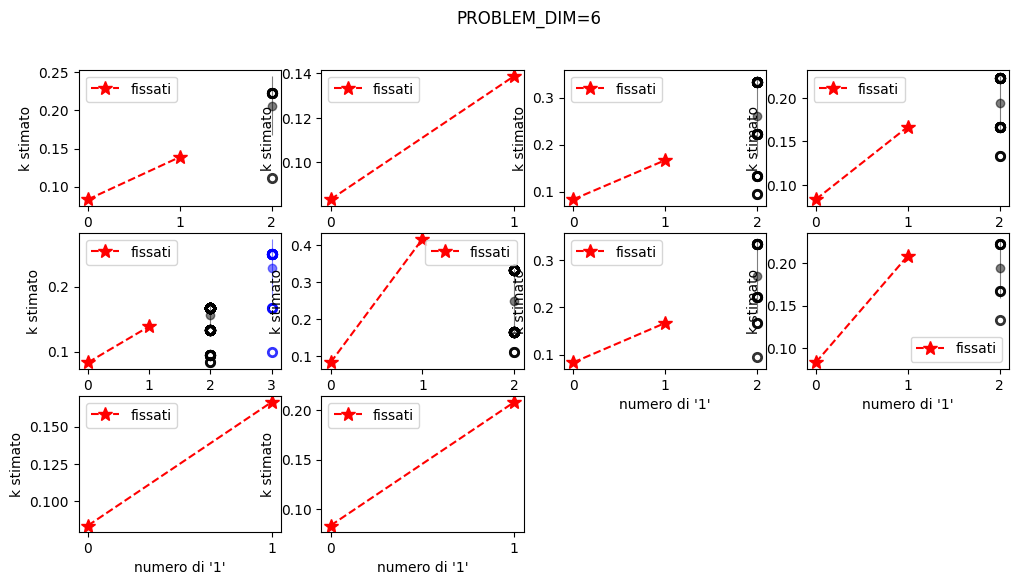

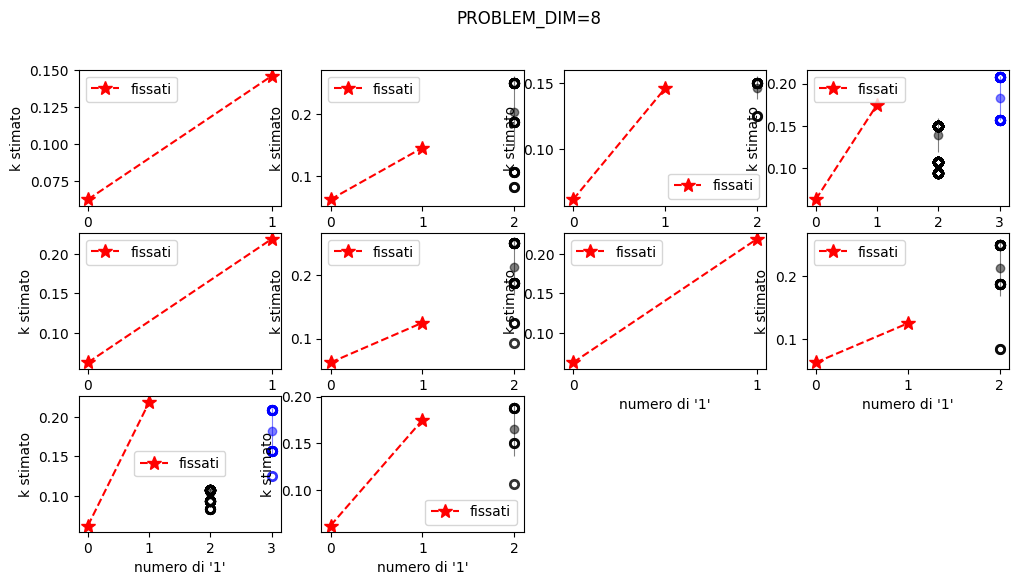

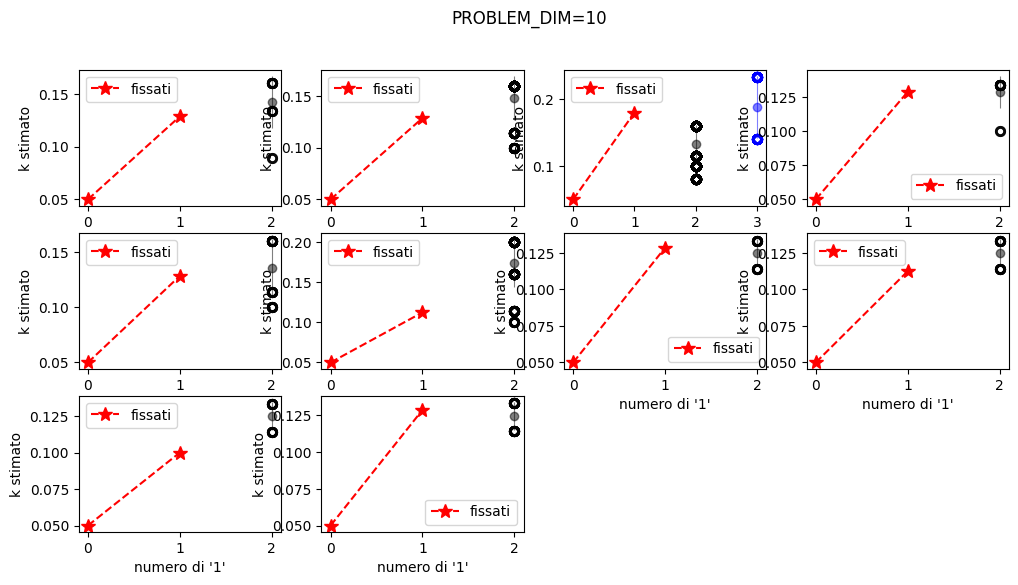

In [234]:
for PROBLEM_DIM in [6,8,10]:
    plt.figure(figsize=(12,6))
    plt.tight_layout()
    plt.suptitle(f"PROBLEM_DIM={PROBLEM_DIM}")
    for instance in range(1, 11):
        ### Build the instance.
        U, subsets_dict = define_instance(PROBLEM_DIM, instance, verbose=False)
        subsets = list(subsets_dict.values())
        lengths = [len(s) for s in subsets]
        # build_instance_graph(subsets)
            
        #####################################
        ### Find feasible states.
        
        _, _, states_feasible, _, EXACT_COVERS = find_spectrum(U, subsets_dict, PROBLEM_DIM, k=1)
        
        MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]
        
        # print("EXACT_COVERS:", EXACT_COVERS)
        # print("MEC:", MEC)
        
        # print("\nAll feasible states:", states_feasible)
        
        #####################################
        ### The L_EC are the lengths of the exact covers.
        L_EC = [e.count("1") for e in EXACT_COVERS]
        # FIXED_L = min(L_EC) ## se prende proprio la MEC
        # FIXED_L = max(L_EC) ## se prende la EC più grande
        FIXED_L = PROBLEM_DIM
        
        #####################################
        ### PRIMA RIORDINO IN BASE AL NUMERO DI "1"
        how_many_ones = lambda x: x.count("1")
        states_feasible_ordered = sorted(states_feasible, key=how_many_ones)
        
        ### POI RAGGRUPPO IN BASE AL NUMERO DI "1"
        # print("\nRAGGRUPPO IN BASE AL NUMERO DI '1'")
        states_feasible_grouped = dict()
        for key, group in groupby(states_feasible_ordered, how_many_ones):
            states_feasible_grouped[key] = list(group)
        # print(states_feasible_grouped)
        
        #########################################
        ### BUILD THE DICTIONARY CONTAINING RATIOS
        ratio_for_every_num_of_ones = dict()
        for num_of_ones in range(min(FIXED_L, max(states_feasible_grouped.keys()))):
            # print(f"\n### num_of_ones={num_of_ones} ###\n")
            #### These are computed in every case since every instance has
            #### the zero-state and the one-states.
            if(num_of_ones == 0 or num_of_ones == 1):
                states = states_feasible_grouped[num_of_ones]
                ratio_list = find_k_given_B_and_L(states, U, subsets, FIXED_L, 
                                                  min_B=num_of_ones, max_B=num_of_ones)
                if ratio_list != []:
                    ratio_for_every_num_of_ones[num_of_ones] = ratio_list[0] # since it has only one element
        
            #### For higher num_of_ones: let's see how the ratio 
            #### estimate changes when we take different subsets. 
            else:
                ratio_for_every_num_of_ones[num_of_ones] = []
                for sub in get_all_subsets(states_feasible_grouped[num_of_ones]):
                    # print(sub)
                    ratio_list = find_k_given_B_and_L(sub, U, subsets, FIXED_L, 
                                                      min_B=num_of_ones, max_B=num_of_ones)
                    if ratio_list != []:
                        ratio_for_every_num_of_ones[num_of_ones].append(ratio_list[0])
        
                #### If, for a specific num_of_ones, no ratio is found 
                #### (for example if for that num_of_ones we only have an exact cover), 
                #### then remove that num_of_ones.
                if ratio_for_every_num_of_ones[num_of_ones] == []:
                    ratio_for_every_num_of_ones.pop(num_of_ones)
                    
        # print(ratio_for_every_num_of_ones)
        
        
        ########################################
        ### PLOT
        k = ratio_for_every_num_of_ones
        plt.subplot(3,4,instance)
        
        plt.plot([0,1], [k[0], k[1]], marker='*', color='r', linestyle='dashed', markersize=10, label="fissati")
        
        if FIXED_L > 2:
            colors = iter(["k", "b", "g"])
            for num_of_ones,ratio_list in list(k.items())[2:]:
                c = next(colors)
                plt.plot(num_of_ones, [ratio_list], marker='o', color=c, linestyle="dashed", linewidth=0.8,
                         markerfacecolor="None", markeredgecolor=c, markeredgewidth=2, alpha=0.8)
                plt.errorbar(x=num_of_ones, y=np.mean(ratio_list), yerr=np.std(ratio_list),marker='o', 
                             color=c, linestyle="dashed", linewidth=0.8, alpha=0.5)
        
        plt.ylabel("k stimato")
        plt.xlabel("numero di '1'")
        
        plt.gca().xaxis.set_major_locator(MultipleLocator(1))
        plt.legend()
    plt.show()

In [83]:
# ### k_0 E k_1 LI POSSO CALCOLARE ANCHE SENZA DWAVE QUINDI BASTA VEDERE COME CAMBIA IL CALCOLO DI k_2, ..., k_L

# all_zero_state = {'0'*PROBLEM_DIM}
# zero_and_one = one_one_states| all_zero_state 
# k_true_0 = find_k_given_B_and_L(all_zero_state, U, subsets, min(L_EC), max_B=0)

# string = '0'*(PROBLEM_DIM-1) + '1'
# one_one_states = set(["".join(elem) for elem in distinct_permutations(string)])
# k_true_1 = find_k_given_B_and_L(one_one_states, U, subsets, min(L_EC), min_B=0, max_B=1)

[('000000', 0)]
Maximum weight: 0
k_0 = 0.041666666666666664
[('000010', 6), ('000100', 3), ('000001', 5), ('010000', 6), ('001000', 3), ('100000', 6)]
Maximum weight: 6
k_1 = 0.05555555555555555
